In [ ]:
pip install scikit-fuzzy==0.5.0

In [ ]:

import random
import sys
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
fluxo_de_carros = ctrl.Antecedent(np.arange(0, 11, 1), 'fluxo_de_carros')      # 0..10
fluxo_de_pedestres = ctrl.Antecedent(np.arange(0, 11, 1), 'fluxo_de_pedestres')      # 0..10
horario = ctrl.Antecedent(np.arange(0, 11, 1), 'horario')        # 0..10
clima = ctrl.Antecedent(np.arange(0, 11, 1), 'clima')            # 0..10

# saída
tempo_semaforo = ctrl.Consequent(np.arange(0, 31, 1), 'tempo_semaforo')  # 0..30 segundos

# memberships - fluxo carros / pedestres (Baixo/Médio/Alto)
fluxo_de_carros['Baixo']  = fuzz.trimf(fluxo_de_carros.universe, [0, 0, 4])
fluxo_de_carros['Médio']  = fuzz.trimf(fluxo_de_carros.universe, [2, 5, 8])
fluxo_de_carros['Alto']   = fuzz.trimf(fluxo_de_carros.universe, [6, 10, 10])

fluxo_de_pedestres['Baixo']  = fuzz.trimf(fluxo_de_pedestres.universe, [0, 0, 4])
fluxo_de_pedestres['Médio']  = fuzz.trimf(fluxo_de_pedestres.universe, [2, 5, 8])
fluxo_de_pedestres['Alto']   = fuzz.trimf(fluxo_de_pedestres.universe, [6, 10, 10])

# horario categórico
horario['Baixo'] = fuzz.trimf(horario.universe, [0, 0, 4])
horario['Normal'] = fuzz.trimf(horario.universe, [2, 5, 8])
horario['Pico'] = fuzz.trimf(horario.universe, [6, 10, 10])

# clima
clima['Ensolarado'] = fuzz.trimf(clima.universe, [0, 0, 4])
clima['Nublado']    = fuzz.trimf(clima.universe, [2, 5, 8])
clima['Chuvoso']    = fuzz.trimf(clima.universe, [6, 10, 10])

# saída tempo do semáforo (Baixo / Médio / Alto)
tempo_semaforo['Baixo'] = fuzz.trimf(tempo_semaforo.universe, [0, 0, 8])
tempo_semaforo['Médio'] = fuzz.trimf(tempo_semaforo.universe, [6, 15, 22])
tempo_semaforo['Alto']  = fuzz.trimf(tempo_semaforo.universe, [18, 30, 30])



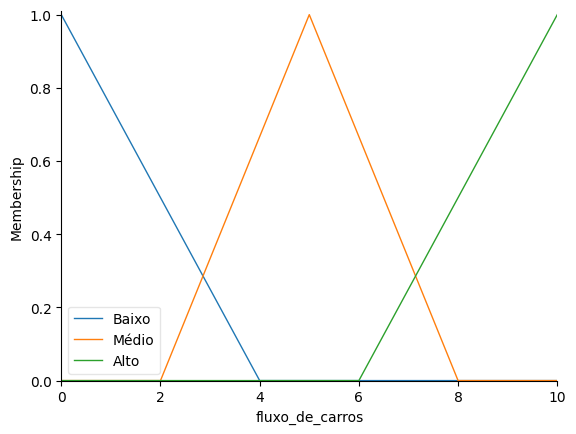

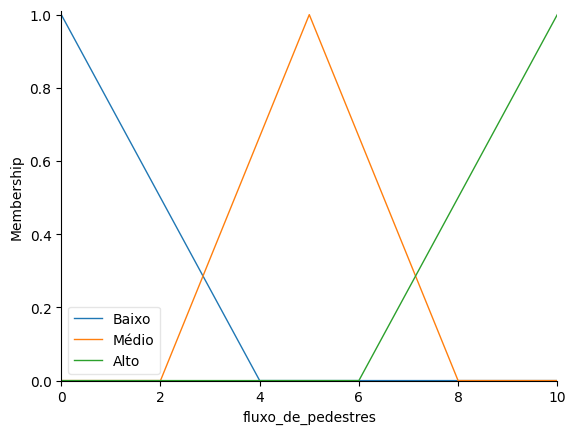

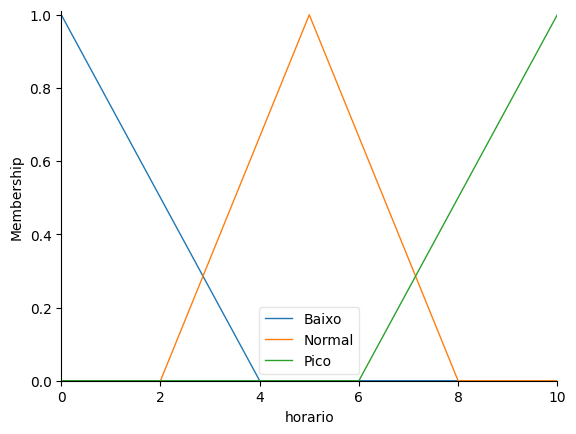

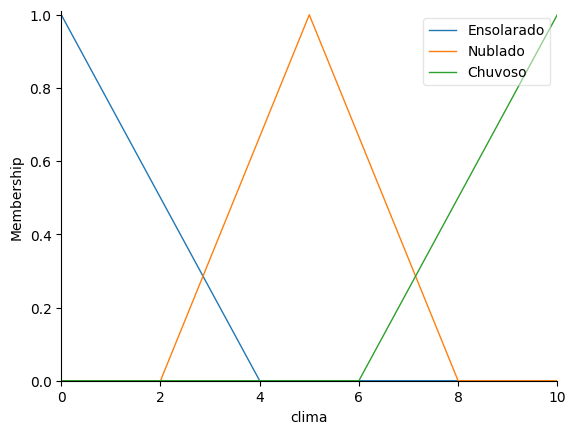

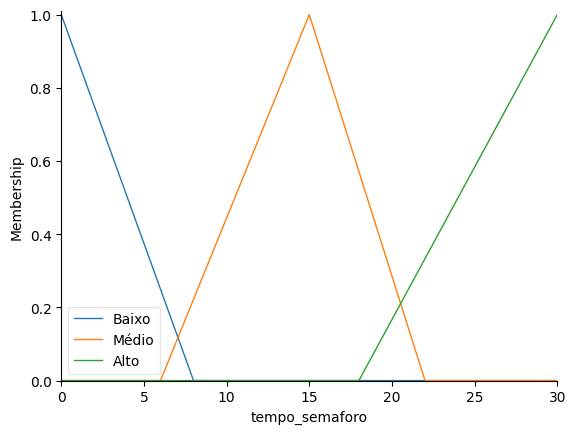

In [ ]:
fluxo_de_carros.view()
fluxo_de_pedestres.view()
horario.view()
clima.view()
tempo_semaforo.view()

In [ ]:
regras = []

regras.append(ctrl.Rule(fluxo_de_carros['Alto'] & horario['Pico'], tempo_semaforo['Alto']))

# 2. SE (Fluxo de Carros é Médio) E (Fluxo de Pedestres é Médio) E (Horário é Normal) ENTÃO (Tempo é Médio).
regras.append(ctrl.Rule(fluxo_de_carros['Médio'] & fluxo_de_pedestres['Médio'] & horario['Normal'], tempo_semaforo['Médio']))

# 3. SE (Fluxo de Carros é Baixo) OU (Fluxo de Pedestres é Baixo) ENTÃO (Tempo é Baixo).
regras.append(ctrl.Rule(fluxo_de_carros['Baixo'] | fluxo_de_pedestres['Baixo'], tempo_semaforo['Baixo']))

# 4. SE (Fluxo de Carros é Alto) E (Fluxo de Pedestres é Alto) E (Horário é Normal) ENTÃO (Tempo é Médio).
regras.append(ctrl.Rule(fluxo_de_carros['Alto'] & fluxo_de_pedestres['Alto'] & horario['Normal'], tempo_semaforo['Médio']))

# 5. SE (Fluxo de Carros é Alto) E (Fluxo de Pedestres é Alto) E (Horário é Pico) ENTÃO (Tempo é Alto).
regras.append(ctrl.Rule(fluxo_de_carros['Alto'] & fluxo_de_pedestres['Alto'] & horario['Pico'], tempo_semaforo['Alto']))

# 6. SE (Fluxo de Carros é Alto) E (Clima é Chuvoso) ENTÃO (Tempo é Alto).
regras.append(ctrl.Rule(fluxo_de_carros['Alto'] & clima['Chuvoso'], tempo_semaforo['Alto']))

# Regras adicionais conforme especificado:
# - SE Fluxo de Carros é Baixo E Fluxo de Pedestres é Baixo E Horário Baixo ENTÃO Tempo Baixo.
regras.append(ctrl.Rule(fluxo_de_carros['Baixo'] & fluxo_de_pedestres['Baixo'] & horario['Baixo'], tempo_semaforo['Baixo']))

# - SE Fluxo de Carros é Baixo E Fluxo de Pedestres é Alto ENTÃO Tempo Médio.
regras.append(ctrl.Rule(fluxo_de_carros['Baixo'] & fluxo_de_pedestres['Alto'], tempo_semaforo['Médio']))

# - SE Fluxo de Carros é Médio E Horário é Baixo ENTÃO Tempo Médio.
regras.append(ctrl.Rule(fluxo_de_carros['Médio'] & horario['Baixo'], tempo_semaforo['Médio']))

# monta sistema
sistema = ctrl.ControlSystem(regras)
execucao_simulador = ctrl.ControlSystemSimulation(sistema)





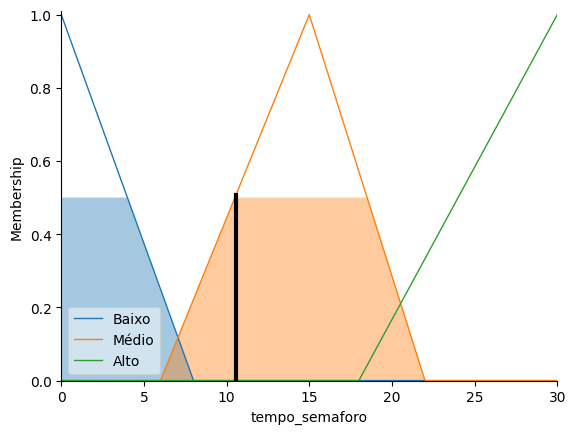

In [ ]:
execucao_simulador.input['fluxo_de_carros']=2
execucao_simulador.input['fluxo_de_pedestres']=10
execucao_simulador.input['horario']=4
execucao_simulador.input['clima']=5

execucao_simulador.compute()

#print(execucao_simulador.output['tempo_semaforo'])


#fluxo_de_carros.view(sim=execucao_simulador)
#fluxo_de_pedestres.view(sim=execucao_simulador)
#horario.view(sim=execucao_simulador)
#clima.view(sim=execucao_simulador)
tempo_semaforo.view(sim=execucao_simulador)

In [ ]:
print(f'Tempo para a troca do semaforo: {execucao_simulador.output['tempo_semaforo']}')

Tempo para a troca do semaforo: 10.5625
